# DS 2500: Data Wrangling<br>Module Assignment 5
April 5, 2022

Student: Alexander Shahramanyan<br>
Instructor: Professor Marina Kogan

## Introduction
In the article <i>"The employment status of people with mental illness: National survey data from 2009 and 2010"</i>, the authors present their study which aims to describe employment by mental illness severity in the US during 2009-2010. Results showed that employment rates decreased with increasing mental illness severity. Additionally, over a third of people with serious mental illness, 39%, had incomes below $10,000 compared to 23\% among people without mental illness. It was concluded that more severe mental illness was associated with lower employment rates in 2009-2010.

## Dataset Description:
**Unemployment and Mental Illness Survey Dataset:** This dataset contains the results of a paid research survey to explore the linkage between mental illness and unemployment.
<br>

*Columns*:<br>
31 columns, containing information about:
- Mentall illness
- Symptoms & Side effects
- Employment
- Education
- Annual income
- Resume gaps
- Hospitalization
- Demographics

*Number of entries (rows)*: 334

## Setup

First, I import all the libraries I will need throughout the notebook and set the plotting parameters for better visualizations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import textwrap

# Plotting settings
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'serif'

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

PALETTE = ['#FF784F', '#00A6A6', '#F39B6D', '#AABD8C', '#3E6990']

Then I need to load the dataset.

In [2]:
df = pd.read_csv("cleaned_data.csv")

The next step is checking the dataset.

### Dataset Check

In [3]:
# Check dataset shape
df.shape

(334, 31)

In [4]:
# Check the top of the data
df.head()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


In [5]:
# Check the bottom of the data
df.tail()

,I am currently employed at least part-time,I identify as having a mental illness,Education,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,...,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness,Age,Gender,Household Income,Region,Device Type
329,0,0,High School or GED,1,0,NaN,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,45-60,Female,Prefer not to answer,Mountain,Android Phone / Tablet
330,1,0,Some Undergraduate,1,0,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,18-29,Male,"$50,000-$74,999",Pacific,Windows Desktop / Laptop
331,1,0,Some Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,> 60,Female,"$10,000-$24,999",West North Central,Windows Desktop / Laptop
332,0,1,Some Undergraduate,0,1,1.0,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,18-29,Female,"$0-$9,999",West South Central,Android Phone / Tablet
333,1,1,Some Undergraduate,1,0,0.0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,18-29,Female,"$10,000-$24,999",Pacific,Android Phone / Tablet


In [6]:
# Null values
df.isnull().sum().sort_values(ascending=False)

How many days were you hospitalized for your mental illness     37
Region                                                           2
Tiredness                                                        1
Compulsive behavior                                              1
Panic attacks                                                    1
Mood swings                                                      1
Obsessive thinking                                               1
Lack of concentration                                            1
I am currently employed at least part-time                       0
I am on section 8 housing                                        0
Household Income                                                 0
Gender                                                           0
Age                                                              0
Depression                                                       0
Anxiety                                                       

We're missing a bunch of hospitalization data. For now I will not do anything with it, since I do not plan to use it in my analysis.

In [7]:
# Data description
df.describe()

,I am currently employed at least part-time,I identify as having a mental illness,I have my own computer separate from a smart phone,I have been hospitalized before for my mental illness,How many days were you hospitalized for your mental illness,I am legally disabled,I have my regular access to the internet,I live with my parents,I have a gap in my resume,Total length of any gaps in my resume in months,...,I am on section 8 housing,How many times were you hospitalized for your mental illness,Lack of concentration,Anxiety,Depression,Obsessive thinking,Mood swings,Panic attacks,Compulsive behavior,Tiredness
count,334.000000,334.000000,334.000000,334.000000,297.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,333.000000,334.000000,334.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.679641,0.239521,0.874251,0.077844,3.276094,0.098802,0.964072,0.110778,0.245509,8.497006,...,0.020958,1.194611,0.153153,0.299401,0.257485,0.126126,0.114114,0.147147,0.087087,0.300300
std,0.467315,0.427431,0.332063,0.268328,14.126045,0.298844,0.186390,0.314328,0.431034,20.722643,...,0.143459,8.115227,0.360677,0.458683,0.437905,0.332491,0.318428,0.354786,0.282387,0.459078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.750000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,100.000000,...,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the column names are lengthy, so I will make rename the columns so that working with the dataset becomes easier.

In [8]:
# A dictionary mapping the column names to their new values
rename_cols = {'I am currently employed at least part-time': 'curr_employed',\
               'I identify as having a mental illness': 'illness',\
               'Education': 'education',\
               'I have my own computer separate from a smart phone': 'computer',\
               'I have been hospitalized before for my mental illness': 'been_hospitalized',\
               'How many days were you hospitalized for your mental illness': 'days_hospitalized',\
               'I am legally disabled': 'disabled',\
               'I have my regular access to the internet': 'internet_access',\
               'I live with my parents': 'live_with_parents',\
               'I have a gap in my resume': 'resume_gap',\
               'Total length of any gaps in my resume in months': 'resume_gap_len',\
               'Annual income (including any social welfare programs) in USD': 'annual_income',\
               'I am unemployed': 'unemployed',\
               'I read outside of work and school': 'read',\
               'Annual income from social welfare programs': 'annual_income_social_welfare',\
               'I receive food stamps': 'food_stamps',\
               'I am on section 8 housing': 'section_8_housing',\
               'How many times were you hospitalized for your mental illness': 'times_hospitalized',\
               'Lack of concentration': 'lack_of_concentration',
               'Anxiety': 'anxiety',\
               'Depression': 'depression',\
               'Obsessive thinking': 'obsessive_thinking',\
               'Mood swings': 'mood_swings',\
               'Panic attacks': 'panic_attacks',
               'Compulsive behavior': 'compulsive_behavior',\
               'Tiredness': 'tiredness',
               'Age': 'age',\
               'Gender': 'gender',\
               'Household Income': 'household_income',\
               'Region': 'region',\
               'Device Type': 'device' }

In [9]:
# Rename the columns
df.rename(columns=rename_cols, inplace=True)

In [10]:
# Check new column names
df.head()

,curr_employed,illness,education,computer,been_hospitalized,days_hospitalized,disabled,internet_access,live_with_parents,resume_gap,...,obsessive_thinking,mood_swings,panic_attacks,compulsive_behavior,tiredness,age,gender,household_income,region,device
0,0,0,High School or GED,0,0,0.0,0,1,0,1,...,1.0,0.0,1.0,0.0,0.0,30-44,Male,"$25,000-$49,999",Mountain,Android Phone / Tablet
1,1,1,Some Phd,1,0,0.0,0,1,0,0,...,0.0,0.0,1.0,0.0,1.0,18-29,Male,"$50,000-$74,999",East South Central,MacOS Desktop / Laptop
2,1,0,Completed Undergraduate,1,0,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$150,000-$174,999",Pacific,MacOS Desktop / Laptop
3,0,0,Some Undergraduate,1,0,NaN,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,30-44,Male,"$25,000-$49,999",New England,Windows Desktop / Laptop
4,1,1,Completed Undergraduate,1,1,35.0,1,1,0,1,...,1.0,1.0,1.0,1.0,1.0,30-44,Male,"$25,000-$49,999",East North Central,iOS Phone / Tablet


## Dataset Exploration

Now, I will try to understand the data using a couple of visualizations. Firstly, we'll see what percent of the sample identifies as mentally ill. A pie chart will be useful here.

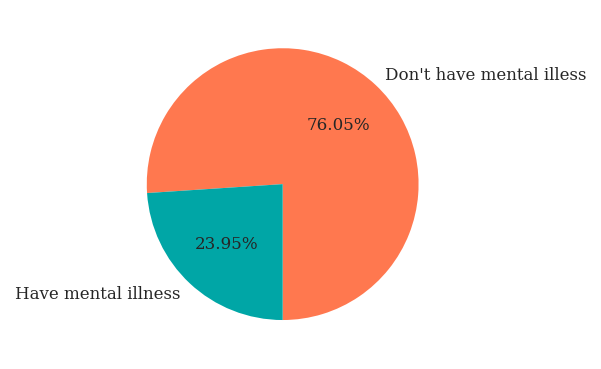

In [11]:
# Distribution by mental illness
plt.pie(x=df.value_counts('illness'),\
             labels=["Don't have mental illess", "Have mental illness"],\
        autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 8})
plt.gcf().set_size_inches(3, 3)

It is also interesting to see whether the percentage of mentally ill people is higher among men or women. To find that out, I will plot two pie charts, one for each gender.

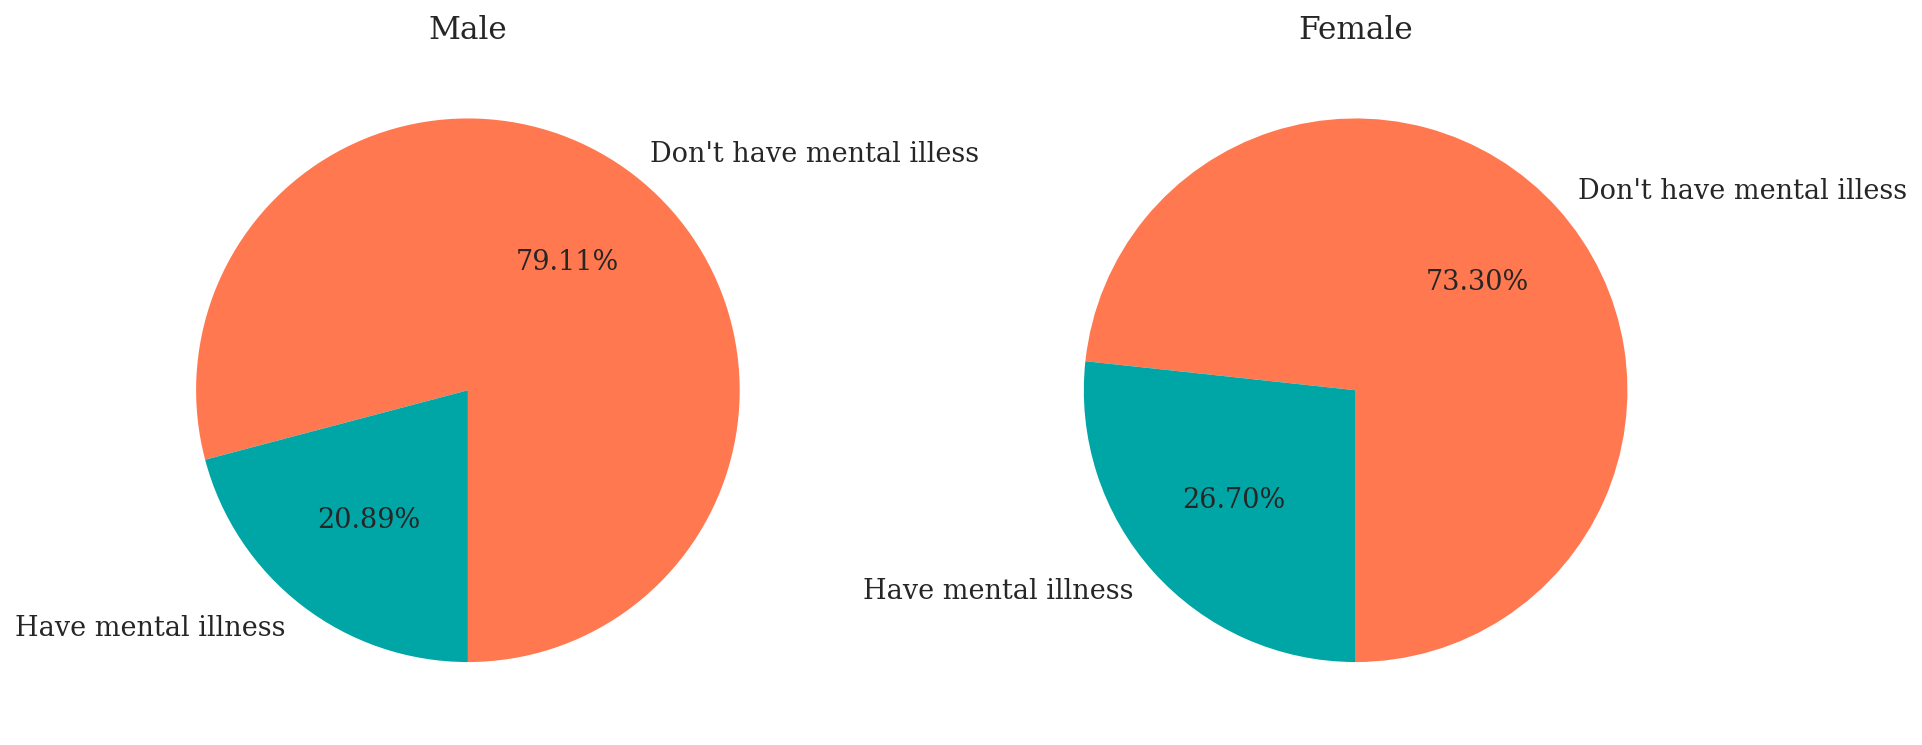

In [12]:
# Distribution by mental illness and gender
fig, ax = plt.subplots(1, 2)

ax[0].pie(x=df[df.gender=='Male'].value_counts('illness'),\
             labels=["Don't have mental illess", "Have mental illness"],\
        autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 13})

ax[0].set_title('Male', fontsize = 15)

ax[1].pie(x=df[df.gender=='Female'].value_counts('illness'),\
             labels=["Don't have mental illess", "Have mental illness"],\
        autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 13})

ax[1].set_title('Female', fontsize = 15)

plt.show()

Now, as we have a better understanding of the percentage of mentally ill people in the dataset, it's time to see if there are any correlated variables. I will plot a heatmap of the correlation coefficients matrix, but I will only include the correlation coefficients whose absolute value is greater than 0.45.

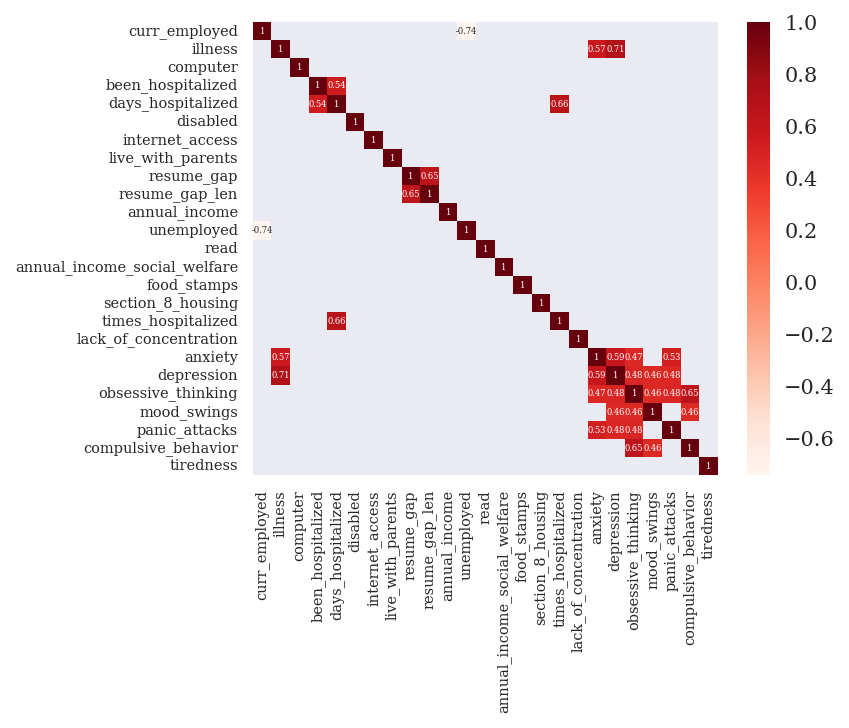

In [13]:
corr_df = df.corr()
kot = corr_df[corr_df.abs() >= .45]
kot.dropna(axis=0, how='all', inplace=True)
kot.dropna(axis=1, how='all', inplace=True)
sns.heatmap(kot, cmap="Reds", annot=True, annot_kws={'size': 4})

plt.gcf().set_size_inches(5,4)

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.show()

As we can see, mentall illness is correlated with some of the symptoms, which is logical. Other than that, symptoms are correlated with each other as well. The other correlations seem to be between similar or opposite variables (such as `been_hospitalized` and `days_hospitalized`, or `curr_employed` and `unemployed`). Below are the correlated variables and the Pearson coefficients.

In [14]:
corr_dict = dict()

for col1 in corr_df.columns:
    for col2 in corr_df.columns:
        if col1 != col2 and f'{col2:>20} - {col1:<20}' not in corr_dict:
            corr = corr_df.loc[col1, col2]
            if abs(corr) > 0.45:
                corr_dict[f'{col1:>20} - {col2:<20}'] = f'{corr:.3f}'
corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1], reverse=True))

for k,v in corr_dict.items():
    print(f'{v:>8} : {k}')

   0.712 :              illness - depression          
   0.662 :    days_hospitalized - times_hospitalized  
   0.653 :   obsessive_thinking - compulsive_behavior 
   0.648 :           resume_gap - resume_gap_len      
   0.587 :              anxiety - depression          
   0.567 :              illness - anxiety             
   0.541 :    been_hospitalized - days_hospitalized   
   0.527 :              anxiety - panic_attacks       
   0.483 :           depression - obsessive_thinking  
   0.481 :   obsessive_thinking - panic_attacks       
   0.476 :           depression - panic_attacks       
   0.465 :              anxiety - obsessive_thinking  
   0.461 :           depression - mood_swings         
   0.461 :   obsessive_thinking - mood_swings         
   0.459 :          mood_swings - compulsive_behavior 
  -0.740 :        curr_employed - unemployed          


### Article Study Results

Now, I will try to see if the conclusions made in the article hold in this dataset. The two conclusions made were that more severe mental illness was associated with lower employment rates and that significantly bigger percentage of people with mental illness (39%) had incomes below $10,000 compared to 23\% among people without mental illness. To check the first statement, I will make a catplot to see the distribution of employment between people with and without mental illness.

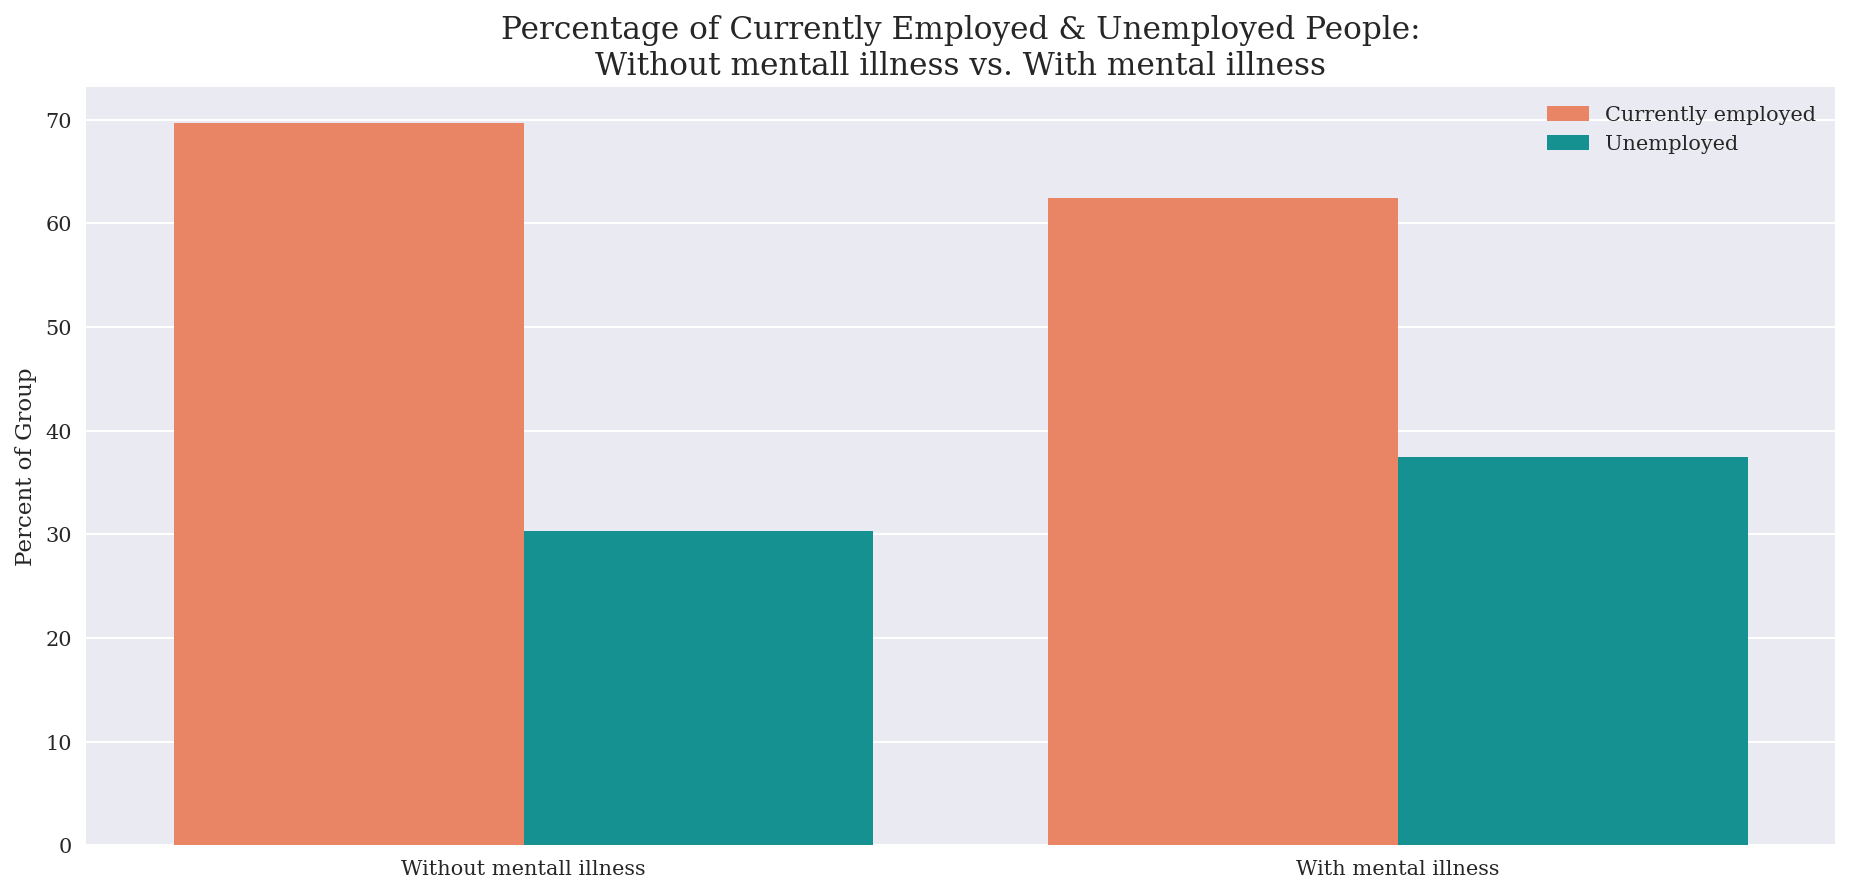

In [15]:
x, y = 'illness', 'curr_employed'

df_a = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent of Group').reset_index()
df_a[y] = df_a[y].replace(1, 'Currently employed').replace(0, 'Unemployed')

ax = sns.catplot(x=x, y='Percent of Group', hue=y, data=df_a, kind='bar', palette=PALETTE, legend=False)

ax.set_xticklabels(['Without mentall illness', 'With mental illness'])
plt.xlabel('')
plt.legend()

plt.title('Percentage of Currently Employed & Unemployed People:\nWithout mentall illness vs. With mental illness',\
          fontsize=15)

plt.gcf().set_size_inches(14,6)

As we can see, there is a significant difference between the percentages of employed people in the two groups. This supports the article conclusion. To see if the second statement is correct for the dataset we have, I will just compare the mean annual incomes between the groups.

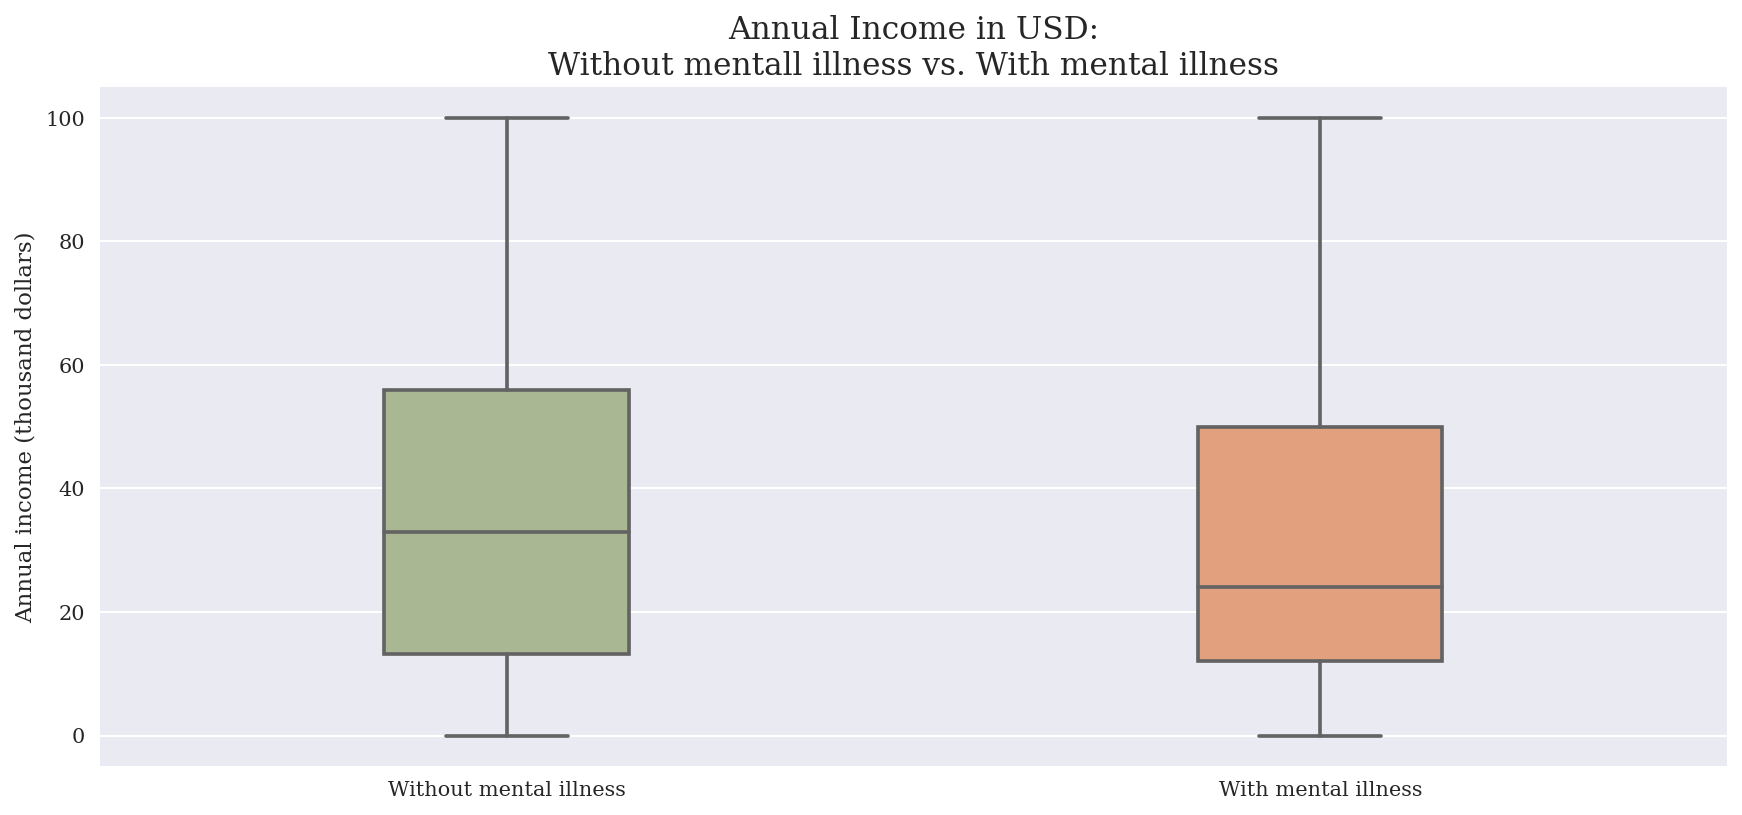

In [16]:
ax = sns.boxplot(y='annual_income', data=df,\
            x='illness', palette=PALETTE[-2::-1], width=0.3)

ax.set_ylabel('Annual income (thousand dollars)')
ax.set_xlabel('')
ax.set_xticklabels(['Without mental illness', 'With mental illness'])

plt.title('Annual Income in USD:\nWithout mentall illness vs. With mental illness', fontsize=15)

plt.gcf().set_size_inches(14, 6)

The boxplot above shows that the average annual income is higher among people without mental illness. This, again, lines up with the article conclusion.

### Alternative Causal Relationships

Having already seen the main causal claims, I will now proceed to finding some alternative causal relationships. The most obvious ones seem to be between the symptoms and employment rate. Firstly, I will try to see how common a symptom is among people with and without mental illness. I am quite sure, symptoms will be much more common among people with mental illness.

In [17]:
# Columns representing symptoms
symptoms = ['lack_of_concentration', 'anxiety', 'depression', 'obsessive_thinking', 'mood_swings',\
            'panic_attacks', 'compulsive_behavior', 'tiredness']

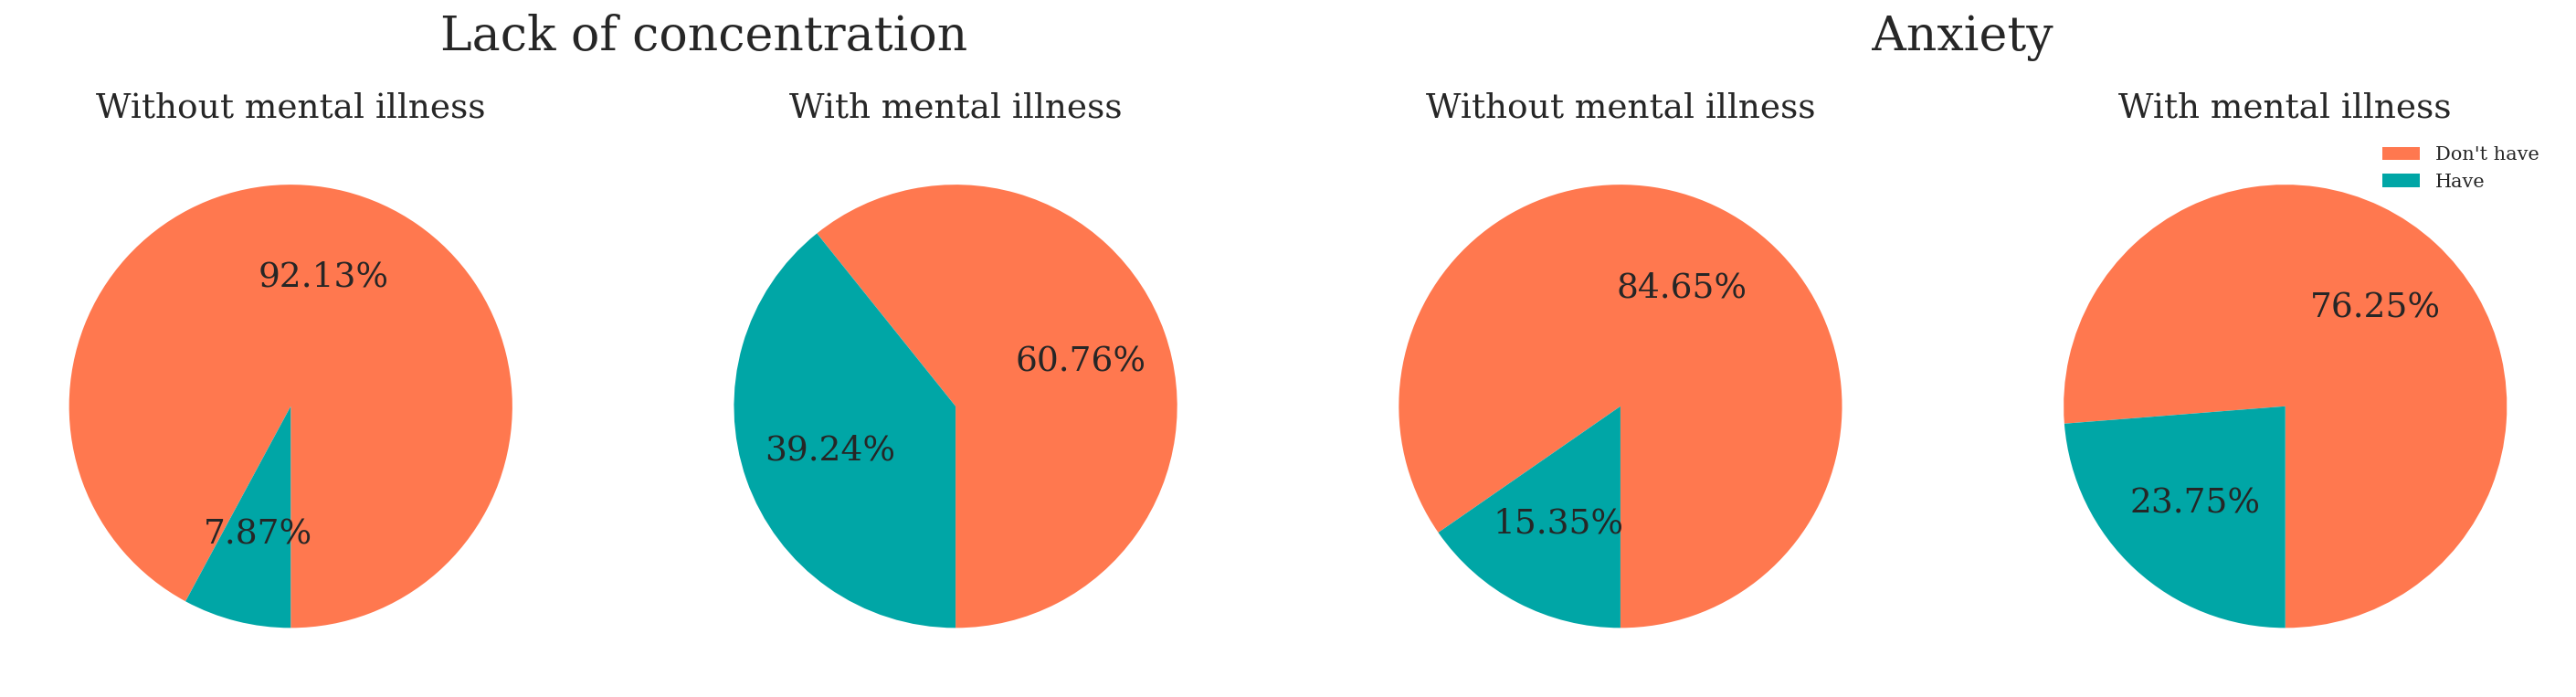

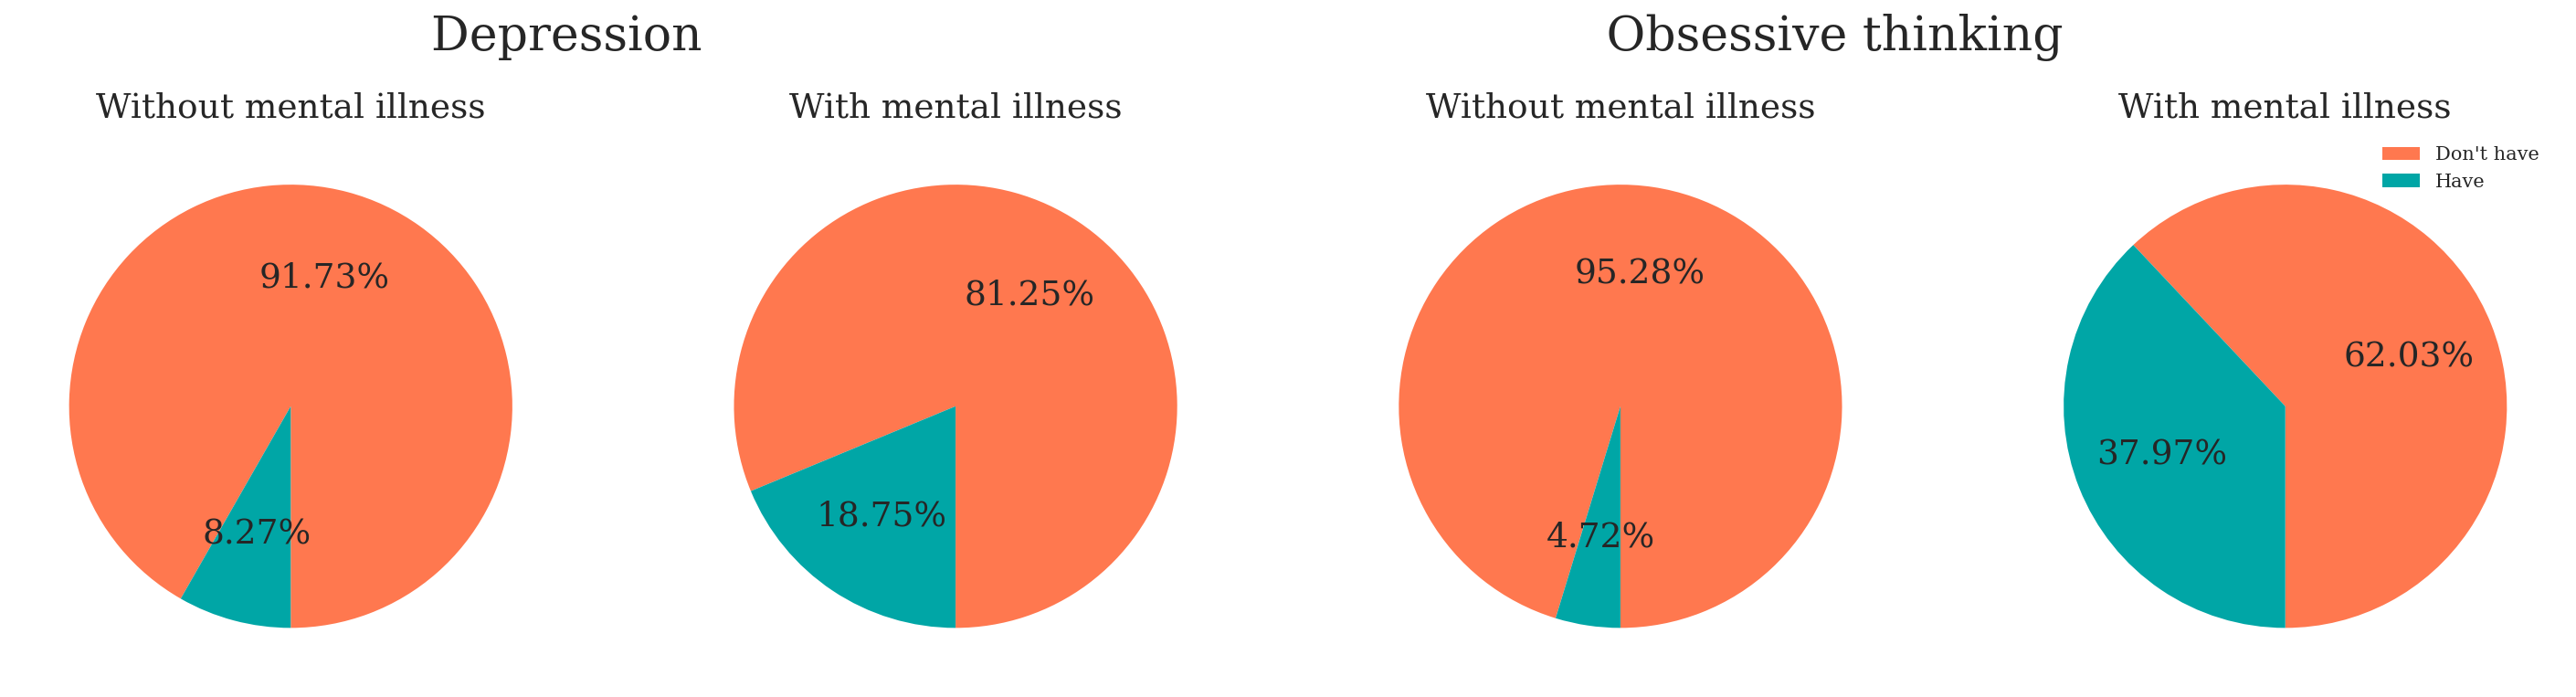

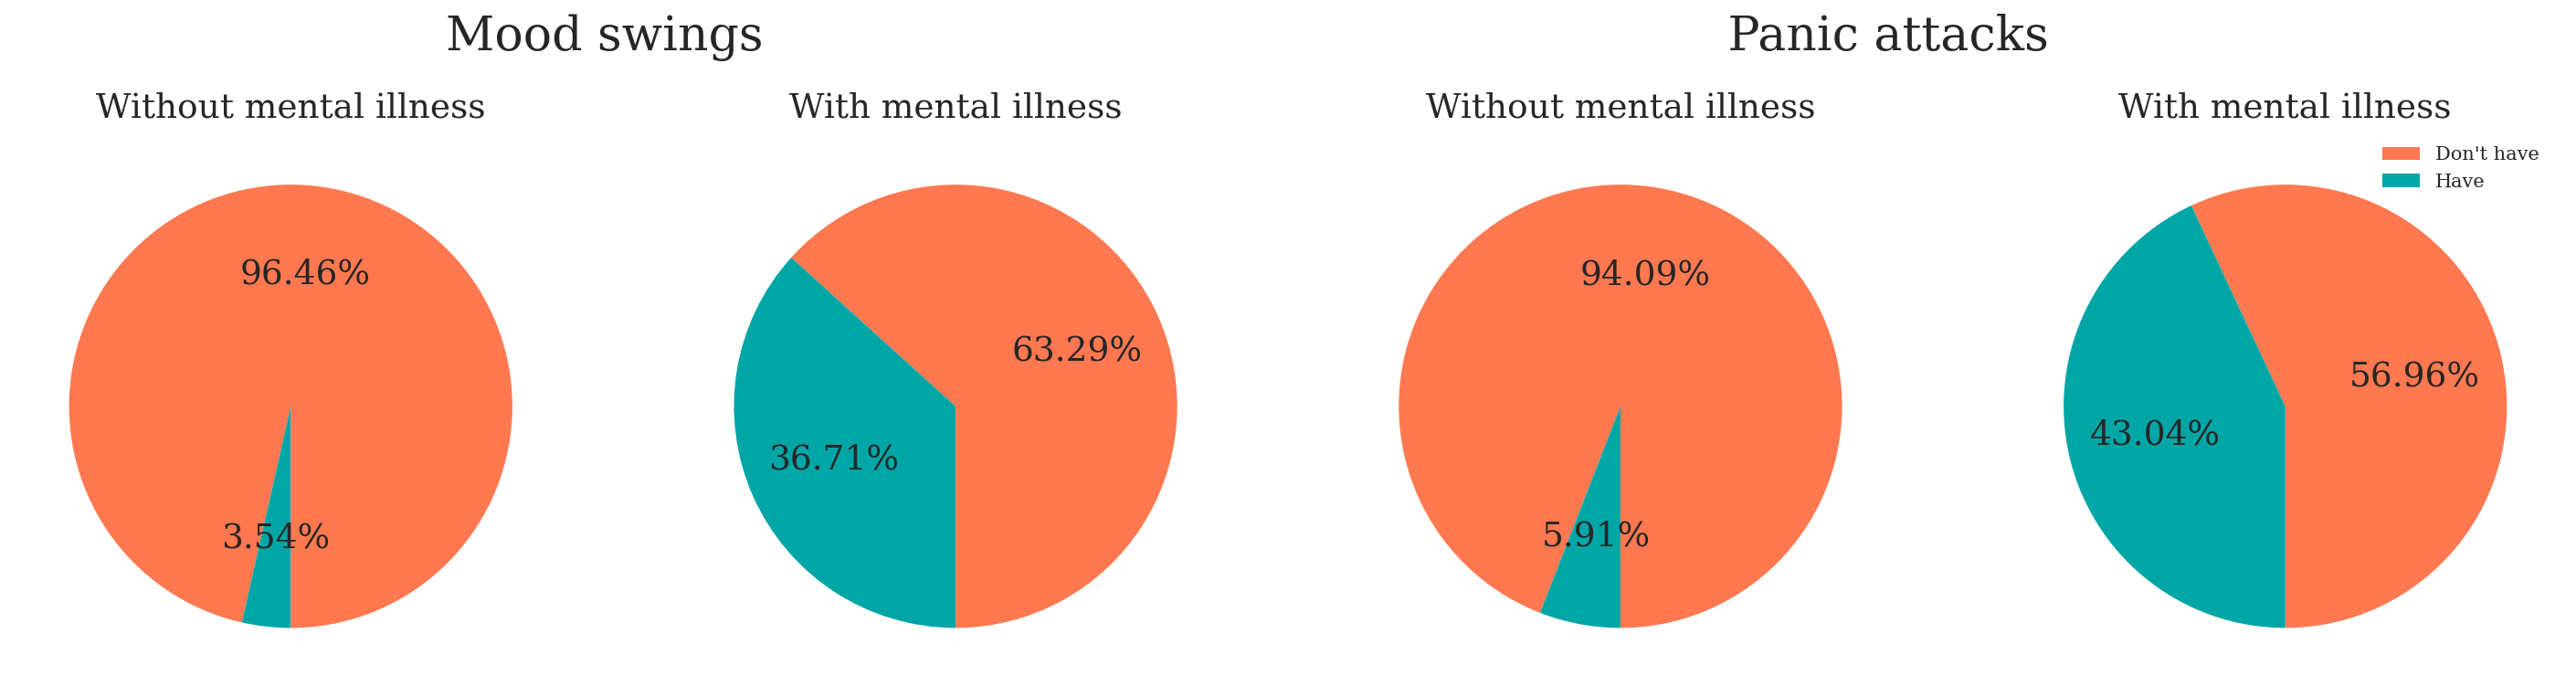

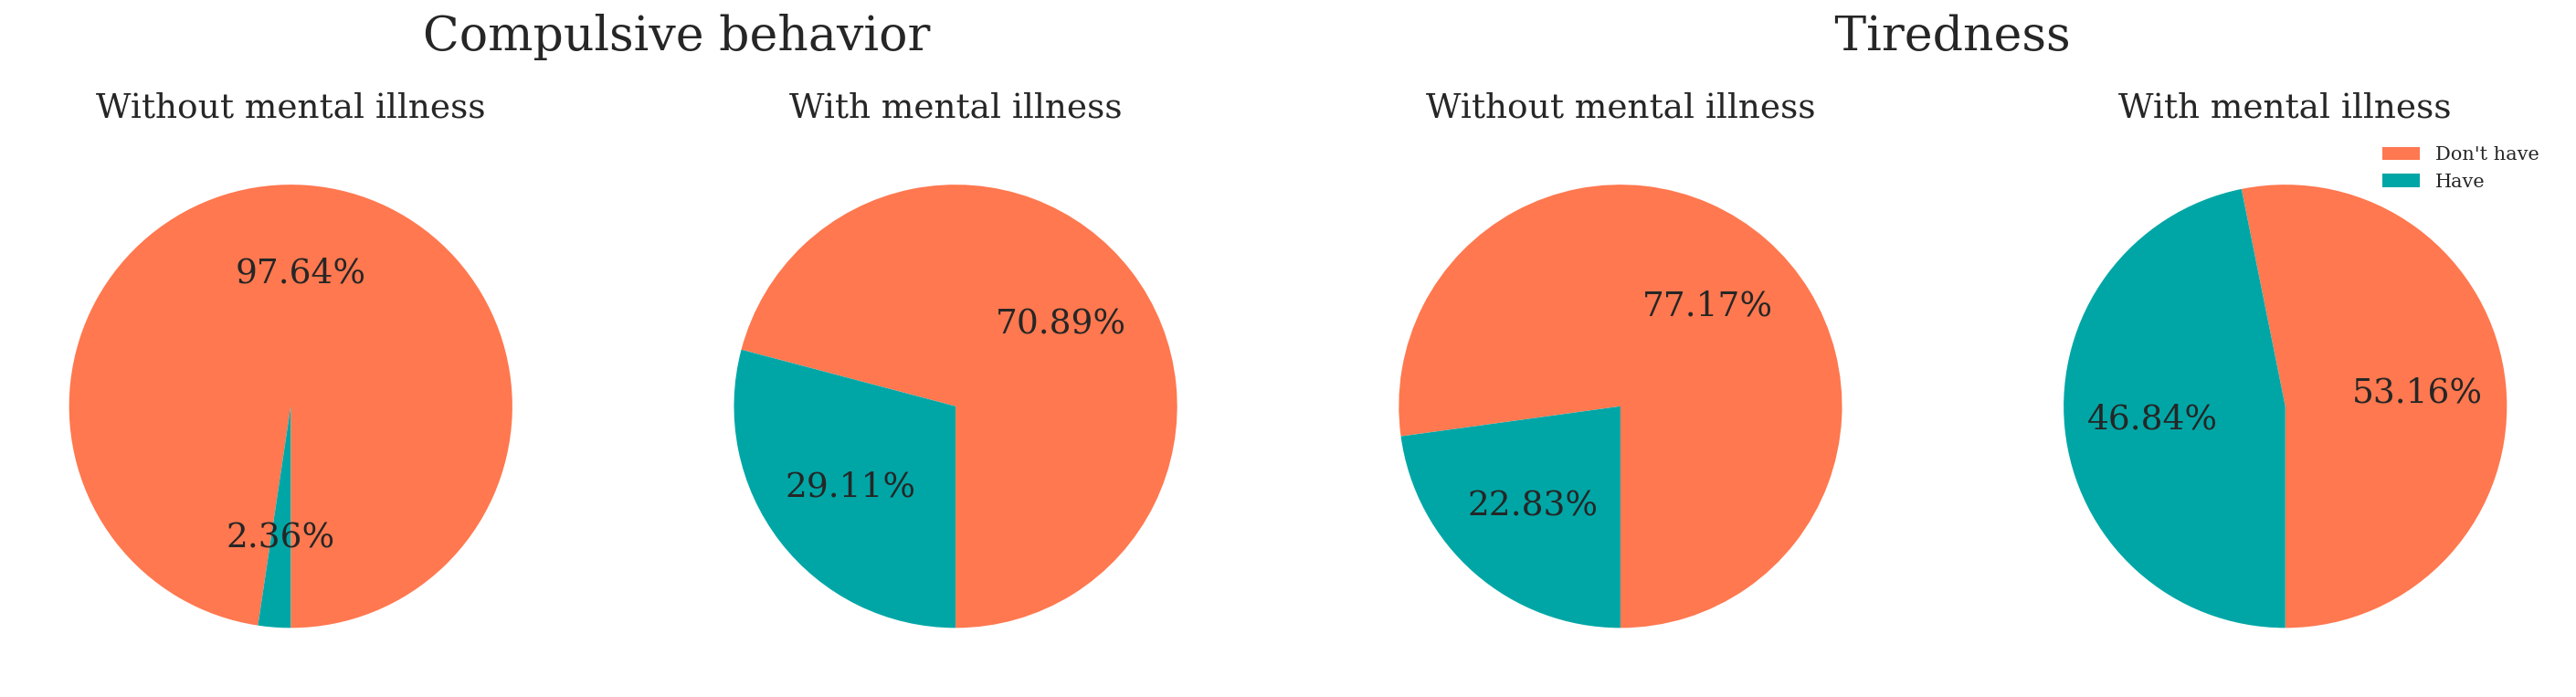

In [18]:
# Symptom distribution by groups
for i in range(0, 8, 2):
    fig, ax = plt.subplots(1, 4)
    symptom1 = symptoms[i]
    symptom2 = symptoms[i+1]
    
    symptom1_name = " ".join(symptom1.split('_')).capitalize()
    symptom2_name = " ".join(symptom2.split('_')).capitalize()
    
    fig.suptitle(f"{symptom1_name:<23} {' '*40} {symptom2_name:>23}", fontsize=25)

    ax[0].pie(x=df[df.illness == 0].value_counts(symptom1),\
            autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 18})

    ax[0].set_title('Without mental illness', fontsize = 18)

    ax[1].pie(x=df[df.illness == 1].value_counts(symptom1),\
             autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 18})

    ax[1].set_title('With mental illness', fontsize = 18)
    
    ax[2].pie(x=df[df.illness == 0].value_counts(symptom2),\
            autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 18})

    ax[2].set_title('Without mental illness', fontsize = 18)

    ax[3].pie(x=df[df.illness == 1].value_counts(symptom2),\
             autopct='%.2f%%', colors=PALETTE, startangle= -90, textprops={'fontsize': 18})

    ax[3].set_title('With mental illness', fontsize = 18)
    
    plt.legend(["Don't have ", "Have"], loc='upper right')
    
    plt.gcf().set_size_inches(24, 6)
    plt.show()
    plt.close()

As expected, for each symptom, a significantly greater share of people with mental illness has the symptom as compared to people without mental illness. No, I will try to find out if there is a relationsip between each of the symptoms and employment rate. For that, I will do a chi-square test between each symptom and employment (`unemployed` variable), since both are categorical. I will take the significance level α = 0.05. The null and alternative hypotheses for the test are as follows:<br>
- **Null Hypothesis:** The grouping variables have no association or correlation amongst them.<br>
- **Alternate Hypothesis:** The variables are associated with each other and there happens to be a correlation between them.

In [19]:
p_values = dict()
for symptom in symptoms:
    symptom_name = " ".join(symptom.split('_')).capitalize()
    
    # Chi-squared - Symptom ~ Unemployment
    chisqt = pd.crosstab(df[symptom], df.unemployed, margins=True)
#     print(chisqt)

    value = np.array([chisqt.iloc[0][0:2].values,
                      chisqt.iloc[1][0:2].values])

    stat, p, dof, expected = chi2_contingency(value)
    p_values[symptom_name] = p

for symptom_name, p in sorted(p_values.items(), key=lambda x: x[1]):
    print(f'{symptom_name:>23} : p-value: {p}')

          Panic attacks : p-value: 0.00012651725568824936
             Depression : p-value: 0.0030369883731511207
                Anxiety : p-value: 0.0033066979986560345
     Obsessive thinking : p-value: 0.012102523966768986
            Mood swings : p-value: 0.025144907074017522
  Lack of concentration : p-value: 0.13233038546910125
              Tiredness : p-value: 0.3155828482808911
    Compulsive behavior : p-value: 0.6536349483040219


As we know, we reject the null hypothesis and assume that the variables are associated and there happens to be some correlation between them if p-value is smaller than the significance level (α = 0.05). Looking at the p-values, we can say that five symptoms, `Panic attacks`, `Depression`, `Anxiety`, `Obsessive thinking`, and `Mood swings` are associated with unemployment. We can conclude that these symptoms negatively affect on people's employment.

While it is obvious that all the symptoms will be correlated with the mental illness, I will do the same experiment with the `illness` variable.

In [20]:
p_values = dict()
for symptom in symptoms:
    symptom_name = " ".join(symptom.split('_')).capitalize()
    
    # Chi-squared - Symptom ~ Illness
    chisqt = pd.crosstab(df[symptom], df.illness, margins=True)
#     print(chisqt)

    value = np.array([chisqt.iloc[0][0:2].values,
                      chisqt.iloc[1][0:2].values])

    stat, p, dof, expected = chi2_contingency(value)
    p_values[symptom_name] = p

for symptom_name, p in sorted(p_values.items(), key=lambda x: x[1]):
    print(f'{symptom_name:>23} : p-value: {p}')

             Depression : p-value: 6.437972991029443e-38
                Anxiety : p-value: 1.4422381579189552e-24
          Panic attacks : p-value: 1.792888273961271e-15
            Mood swings : p-value: 2.911168667727081e-15
     Obsessive thinking : p-value: 3.440682311628585e-14
    Compulsive behavior : p-value: 9.574583238497745e-13
  Lack of concentration : p-value: 4.6380617541460486e-11
              Tiredness : p-value: 5.861425266904613e-07


All the p-values are extremely tiny, and, as expected, all the symptoms are correlated with illness. We can say that illness causes the symptoms. Just to make sure there really is some correlation between mental illness and unemployment, I'll conduct the same chi-square test.

In [21]:
# Chi-squared - Illness ~ Unemployment
chisqt = pd.crosstab(df.illness, df.unemployed, margins=True)
print(chisqt)

value = np.array([chisqt.iloc[0][0:2].values,
                  chisqt.iloc[1][0:2].values])

stat, p, dof, expected = chi2_contingency(value)

print(f'\np-value: {p}')

unemployed    0   1  All
illness                 
0           197  57  254
1            51  29   80
All         248  86  334

p-value: 0.020518361919181265


The small p-value supports the claim that the two variables are associated. We also know that five of the symptoms are strongly correlated with unemployment. We can say that these symptoms prevent people from having a job.

Finally, we have an *Interaction*: Mental illness causes Symptoms and Unemployment & Symptoms cause Unemployment.<br><br>

<div>
    <img src="https://i.ibb.co/X2dngHY/alt-caus-rel-01.jpg" alt="alt-caus-rel-01" border="0" width="400"/>
</div>

It is also interesting that symptoms are correlated with unemployment more strongly than mental illness (p-values of symptom tests were smaller).

## Write-up

For Module Assignment 5, I have chosen the article about mental illness and unemployment. In the paper, the authors present their study which aims to describe employment by mental illness severity in the US during 2009-2010. Results showed that employment rates decreased with increasing mental illness severity. Additionally, over a third of people with serious mental illness, 39%, had incomes below $10,000 compared to 23\% among people without mental illness. It was concluded that more severe mental illness was associated with lower employment rates in 2009-2010. Hence, the primary causal mechanism being claimed in the article is that the severity of mental illness is correlated with lower employment rates. Other than that, mental illness is associated with lower average annual incomes.

In terms of the dataset provided to work with, it contains the results of a paid research survey aiming to explore the linkage between mental illness and unemployment. There are 31 columns in total, containing information about the mental illness, symptoms & side effects, employment, education, annual income, resume gaps, hospitalization, and demographics. The author of the dataset claims on the Kaggle page that the proportion of people with mental illness in the dataset is approximately equal to estimates of the general population diagnosed with mental illness. One disadvantage of this dataset is that it does not include information on mental illness severity, whereas the paper heavily relies on that.

The dataset contains 8 binary variables, representing the presence of various symptoms. The symptoms are: `Lack of concentration`, `Anxiety`, `Depression, `Obsessive Thinking`, `Mood Swings`, `Panic Attacks`, `Compulsive Behavior`, `Tiredness`. I think some of these symptoms should be correlated with unemployment even stronger than mental illness. Here, I tried to understand these relationships and find alternative causal relationships. Since the symptom variables, the variable representing the presence of mental illness, and the variable representing employment status are all binary, i.e., represent some categories, I will use the chi-square test to see if these variables are associated with each other.

Firstly, I will perform an exploratory data analysis to understand the data before jumping the comparing the original argument with the alternative relationships. After importing the libraries and setting the plotting parameters, I loaded the data. Then I checked the dataset and found there were many missing hospitalization duration data. However, since I did not have plans to use it, I did not do anything. Additionally, I renamed the columns to make them shorter and easier to work with, because initially, they were the full survey questions.

Next, I made a pie chart to understand the distribution of mentally ill people. It turned out 23.95\% of the respondents identified themselves as having a mental illness. It was interesting to see whether the distribution is much different by gender, so I made two more pie charts, one for each gender. I found out that a smaller percentage of men (20.89\%) identified themselves as having a mental illness as compared to women (26.70\%). This is an interesting thing to observe, however, my analysis does not concentrate on gender’s impact on mental illness. The next step was finding the correlations between the variables. For this, I plotted a heatmap of the correlation coefficients matrix, but I only included the correlation coefficients whose absolute value is greater than 0.45. This helped find out that mental illness was correlated with some of the symptoms, which is quite logical. Other than that, symptoms are correlated with each other as well. The other correlations were between similar or opposite variables (such as `been_hospitalized` and `days_hospitalized`, or `curr_employed` and `unemployed`).

Then I tried to see if the conclusions made in the article hold for this data. The two conclusions made were that more severe mental illness was associated with lower employment rates and that a significantly bigger percentage of people with mental illness (39\%) had incomes below $10,000 compared to 23% among people without mental illness. To check the first statement, I made a catplot to see the distribution of employment between people with and without mental illness. There was a significant difference between the percentages of employed people in the two groups. This obviously supports the article's conclusion. To see if the second statement is correct for this dataset, I made a boxplot of annual incomes for two groups: people with and without mental illness. The graph showed that there indeed is a difference, which again lines up with the article's conclusion.

Furthermore, I tried to check the alternative causal relationships. The first thing I did, was to understand whether the symptoms are more common among people with mental illness as compared the people without mental illness. Pie charts showed significant difference for all symptoms: the group with mental illness have a bigger share of people with symptoms. This is not a surprise, however. Next, I will try to see if there is any correlation between the symptoms and unemployment. As mentioned earlier, I will conduct a chi-square test between the symptoms and the variable showing whether the person is unemployed. I have taken the significance level α = 0.05. The null and alternative hypotheses for this test are as follows:

- **Null Hypothesis:** The grouping variables have no association or correlation amongst them.<br>
- **Alternate Hypothesis:** The variables are associated with each other and there happens to be a correlation between them.

Having conducted the test between each symptom and the `unemployed` variable and looked at the p-values, I found out that `Panic attacks`, `Depression`, `Anxiety`, `Obsessive thinking`, and `Mood swings` are associated with unemployment. We can conclude that these symptoms negatively affect people's employment.

While it was obvious that all the symptoms will be correlated with the mental illness, I did the same experiment with the illness variable, which showed that there indeed was a correlation between each symptom and mental illness.

Lastly, I made sure that there is some correlation between mental illness and unemployment. I conducted another chi-square test between `illness` and `unemployment`. The p-value was small enough to reject the null hypothesis and accept there is some association between the variables. Other than this, we also know that five of the symptoms are strongly correlated with unemployment. We can say that these symptoms prevent people from having a job.

Finally, we have an Interaction: Mental illness causes Symptoms and Unemployment & Symptoms cause Unemployment.<br><br>

<div>
    <img src="https://i.ibb.co/X2dngHY/alt-caus-rel-01.jpg" alt="alt-caus-rel-01" border="0" width="400"/>
</div>

It is also interesting that symptoms are correlated with unemployment more strongly than mental illness (p-values of symptom tests were smaller).

The primary causal relationship given as a conclusion of the article relies on the severity of mental illness. The authors concluded that more severe mental illness was associated with lower employment rates. In the dataset I worked with, there were no levels of mental illness. The dataset only contains a variable that represents whether the respondent identifies themselves as having a mental illness or not. Other than that, the symptoms don’t seem to be only a thing for people with mental illness. So, in my analysis, I used self-reported data, which may have many inaccuracies. However, since the distributions line up with the broader population, I think the data is not that bad.

Finally, I would consider exploring the impact of severity of mental illness on the presence and severity of various symptoms, as well as the effect on employment. It would also be interesting to see whether mental illness prevents people from getting a better education, which obviously will affect later employment and income. I also think making a logistic regression model would be interesting.